In [1]:
# imports
import numpy as np
import random
import math
import timeit
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from pylab import *

In [2]:
def write_error_to_file(filename, error):
    f = open(filename, "w+")
    for e in error:
        f.write(str(e)+"\n")
    f.close()
def read_error_from_file(filename):
    with open(filename, 'r') as fp:
        s = fp.readlines()
    return np.array([e.strip() for e in s], dtype='float')

In [3]:
from matplotlib import rc
import matplotlib
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams["mathtext.fontset"] = "cm"

In [4]:
err_L4_T1_S1 = read_error_from_file('L4_T1_S1_error_m25000_t1000_avg.txt')
err_L4_T1_S2 = read_error_from_file('L4_T1_S2_error_m25000_t1000_avg.txt')
err_L4_T1_S3 = read_error_from_file('L4_T1_S3_error_m25000_t1000_avg.txt')
err_L4_T2_S1 = read_error_from_file('L4_T2_S1_error_m25000_t1000_avg.txt')
err_L4_T2_S2 = read_error_from_file('L4_T2_S2_error_m25000_t1000_avg.txt')
err_L4_T2_S3 = read_error_from_file('L4_T2_S3_error_m25000_t1000_avg.txt')
err_L4_T3_S1 = read_error_from_file('L4_T3_S1_error_m25000_t1000_avg.txt')
err_L4_T3_S2 = read_error_from_file('L4_T3_S2_error_m25000_t1000_avg.txt')
err_L4_T3_S3 = read_error_from_file('L4_T3_S3_error_m25000_t1000_avg.txt')

err_L8_T1_S1 = read_error_from_file('L8_T1_S1_error_m25000_t1000_avg.txt')
err_L8_T1_S2 = read_error_from_file('L8_T1_S2_error_m25000_t1000_avg.txt')
err_L8_T1_S3 = read_error_from_file('L8_T1_S3_error_m25000_t1000_avg.txt')
err_L8_T2_S1 = read_error_from_file('L8_T2_S1_error_m25000_t1000_avg.txt')
err_L8_T2_S2 = read_error_from_file('L8_T2_S2_error_m25000_t1000_avg.txt')
err_L8_T2_S3 = read_error_from_file('L8_T2_S3_error_m25000_t1000_avg.txt')
err_L8_T3_S1 = read_error_from_file('L8_T3_S1_error_m25000_t1000_avg.txt')
err_L8_T3_S2 = read_error_from_file('L8_T3_S2_error_m25000_t1000_avg.txt')
err_L8_T3_S3 = read_error_from_file('L8_T3_S3_error_m25000_t1000_avg.txt')


In [5]:
std_L4_T1_S1 = read_error_from_file('L4_T1_S1_error_m25000_t1000_std.txt')
std_L4_T1_S2 = read_error_from_file('L4_T1_S2_error_m25000_t1000_std.txt')
std_L4_T1_S3 = read_error_from_file('L4_T1_S3_error_m25000_t1000_std.txt')
std_L4_T2_S1 = read_error_from_file('L4_T2_S1_error_m25000_t1000_std.txt')
std_L4_T2_S2 = read_error_from_file('L4_T2_S2_error_m25000_t1000_std.txt')
std_L4_T2_S3 = read_error_from_file('L4_T2_S3_error_m25000_t1000_std.txt')
std_L4_T3_S1 = read_error_from_file('L4_T3_S1_error_m25000_t1000_std.txt')
std_L4_T3_S2 = read_error_from_file('L4_T3_S2_error_m25000_t1000_std.txt')
std_L4_T3_S3 = read_error_from_file('L4_T3_S3_error_m25000_t1000_std.txt')

std_L8_T1_S1 = read_error_from_file('L8_T1_S1_error_m25000_t1000_std.txt')
std_L8_T1_S2 = read_error_from_file('L8_T1_S2_error_m25000_t1000_std.txt')
std_L8_T1_S3 = read_error_from_file('L8_T1_S3_error_m25000_t1000_std.txt')
std_L8_T2_S1 = read_error_from_file('L8_T2_S1_error_m25000_t1000_std.txt')
std_L8_T2_S2 = read_error_from_file('L8_T2_S2_error_m25000_t1000_std.txt')
std_L8_T2_S3 = read_error_from_file('L8_T2_S3_error_m25000_t1000_std.txt')
std_L8_T3_S1 = read_error_from_file('L8_T3_S1_error_m25000_t1000_std.txt')
std_L8_T3_S2 = read_error_from_file('L8_T3_S2_error_m25000_t1000_std.txt')
std_L8_T3_S3 = read_error_from_file('L8_T3_S3_error_m25000_t1000_std.txt')

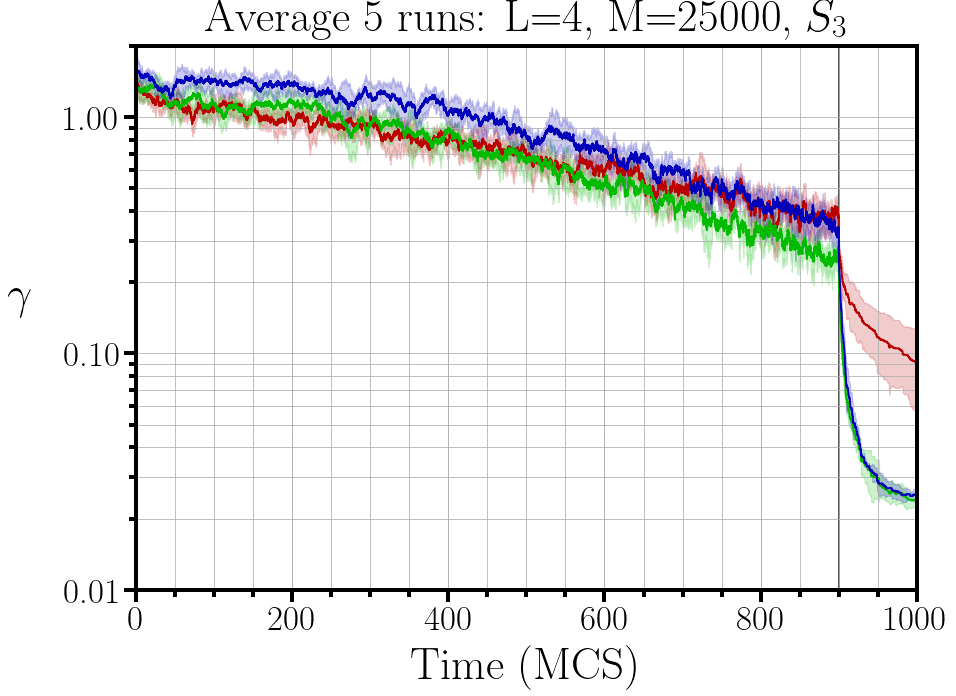

In [8]:
from scipy.interpolate import make_interp_spline, BSpline
wl=2
step = 52
param_spline = 2
color1, color2, color3, gray = '#bb0000', '#00bb00', '#0000bb', '#555555'
x = np.arange(len(err_L4_T1_S1))/32
plt.figure(figsize = (14, 10))
ax = plt.axes()
plt.title(r'Average 5 runs: L=4, M=25000, $S_3$', fontsize=45, y=1.005)
plt.xlabel(r'Time (MCS)', rotation=0, fontsize=45)
plt.ylabel(r'$\gamma$', rotation=0, fontsize=45)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.plot((np.max(x)*0.9, np.max(x)*0.9), (1e-2,2), color=gray, zorder=1, linewidth=2, alpha=1)

#plt.plot(x, err_L4_T1_S1, color=color1, linewidth=wl)
#plt.plot(x, err_L4_T1_S2, color=color1, linewidth=wl)
plt.plot(x, err_L4_T1_S3, color=color1, linewidth=wl)
#plt.plot(x, err_L4_T2_S1, color=color2, linewidth=wl)
#plt.plot(x, err_L4_T2_S2, color=color2, linewidth=wl)
plt.plot(x, err_L4_T2_S3, color=color2, linewidth=wl)
#plt.plot(x, err_L4_T3_S1, color=color3, linewidth=wl)
#plt.plot(x, err_L4_T3_S2, color=color3, linewidth=wl)
plt.plot(x, err_L4_T3_S3, color=color3, linewidth=wl)
#plt.fill_between(x, err_L4_T1_S1 - std_L4_T1_S1, err_L4_T1_S1 + std_L4_T1_S1, color=color1, alpha=0.2)
#plt.fill_between(x, err_L4_T1_S2 - std_L4_T1_S2, err_L4_T1_S2 + std_L4_T1_S2, color=color1, alpha=0.2)
plt.fill_between(x, err_L4_T1_S3 - std_L4_T1_S3, err_L4_T1_S3 + std_L4_T1_S3, color=color1, alpha=0.2)
#plt.fill_between(x, err_L4_T2_S1 - std_L4_T2_S1, err_L4_T2_S1 + std_L4_T2_S1, color=color2, alpha=0.2)
#plt.fill_between(x, err_L4_T2_S2 - std_L4_T2_S2, err_L4_T2_S2 + std_L4_T2_S2, color=color2, alpha=0.2)
plt.fill_between(x, err_L4_T2_S3 - std_L4_T2_S3, err_L4_T2_S3 + std_L4_T2_S3, color=color2, alpha=0.2)
#plt.fill_between(x, err_L4_T3_S1 - std_L4_T3_S1, err_L4_T3_S1 + std_L4_T3_S1, color=color3, alpha=0.2)
#plt.fill_between(x, err_L4_T3_S2 - std_L4_T3_S2, err_L4_T3_S2 + std_L4_T3_S2, color=color3, alpha=0.2)
plt.fill_between(x, err_L4_T3_S3 - std_L4_T3_S3, err_L4_T3_S3 + std_L4_T3_S3, color=color3, alpha=0.2)

#plt.plot(x, avg + std, color=color3, linewidth=wl)
#plt.plot(x, avg - std, color=color3, linewidth=wl)
#plt.fill_between(x, avg - std, avg + std, color=color1, alpha=0.2)
#plt.scatter(flat_matrix(j1), flat_matrix(result1[0][1]), color='#ee2222', label='Sample 1', zorder=6, marker="o", s=300)
#plt.scatter(flat_matrix(j2), flat_matrix(result2[0][1]), color='#E8B201', label='Sample 2', zorder=5, marker="v", s=300)
#plt.scatter(flat_matrix(j3), flat_matrix(result3[0][1]), color='#2222ee', label='Sample 3', zorder=4, marker="^", s=300)
#plt.scatter(flat_sym_matrix(j8), flat_sym_matrix(result8[1]), color='#009900', label='N=8', zorder=5, marker="v")
#plt.scatter(flat_sym_matrix(j12), flat_sym_matrix(result12[1]), color='#2222ee', label='N=12', zorder=4, marker="^")
#plt.scatter(flat_sym_matrix(j16), flat_sym_matrix(result16[1]), color='#E8B201', label='N=16', zorder=3, marker="s")
#plt.scatter(flat_sym_matrix(j20), flat_sym_matrix(result20[1]), color='#B300FF', label='N=20', zorder=2, marker="D")

plt.ylim(1e-2, 2)
plt.xlim(0, np.max(x))
plt.yscale('log')

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '%d' formatting but don't label
# minor ticks.
ax.xaxis.set_major_locator(MultipleLocator(200))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
ax.tick_params(which='both', width=4)
ax.tick_params(which='major', length=12)
ax.tick_params(which='minor', length=7)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)
#plt.legend()
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
plt.grid(True, which='both')
plt.savefig('error_L4_M25000_t1000_S3.png', bbox_inches = 'tight')
plt.show()



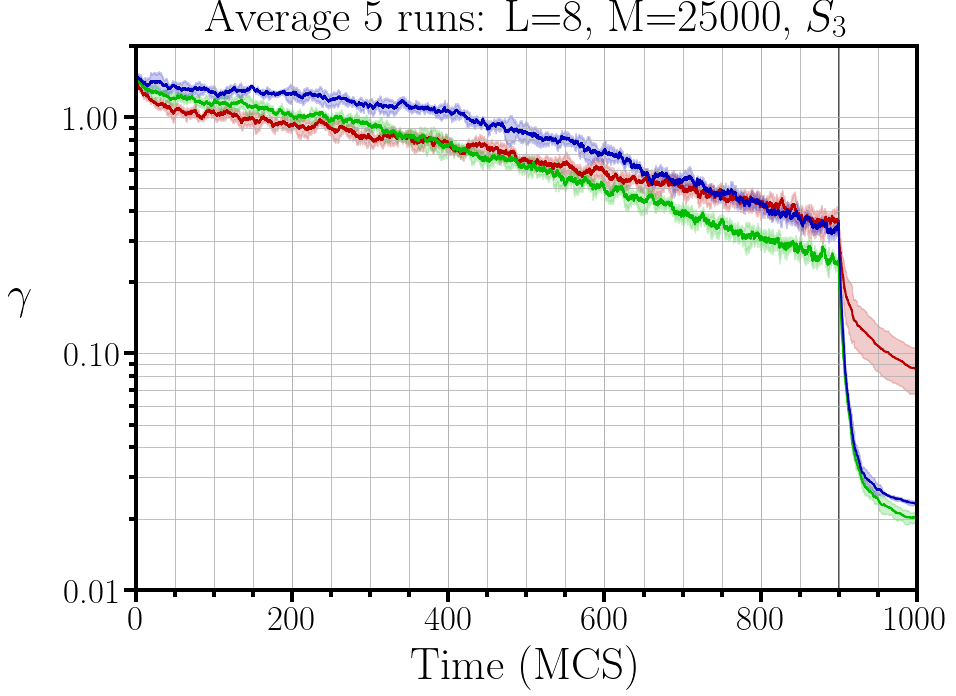

In [11]:
x = np.arange(len(err_L8_T1_S1))/128
plt.figure(figsize = (14, 10))
ax = plt.axes()
plt.title(r'Average 5 runs: L=8, M=25000, $S_3$', fontsize=45, y=1.005)
plt.xlabel(r'Time (MCS)', rotation=0, fontsize=45)
plt.ylabel(r'$\gamma$', rotation=0, fontsize=45)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.plot((np.max(x)*0.9, np.max(x)*0.9), (1e-2,2), color=gray, zorder=1, linewidth=2, alpha=1)

#plt.plot(x, err_L8_T1_S1, color=color1, linewidth=wl)
#plt.plot(x, err_L8_T1_S2, color=color1, linewidth=wl)
plt.plot(x, err_L8_T1_S3, color=color1, linewidth=wl)
#plt.plot(x, err_L8_T2_S1, color=color2, linewidth=wl)
#plt.plot(x, err_L8_T2_S2, color=color2, linewidth=wl)
plt.plot(x, err_L8_T2_S3, color=color2, linewidth=wl)
#plt.plot(x, err_L8_T3_S1, color=color3, linewidth=wl)
#plt.plot(x, err_L8_T3_S2, color=color3, linewidth=wl)
plt.plot(x, err_L8_T3_S3, color=color3, linewidth=wl)
#plt.fill_between(x, err_L8_T1_S1 - std_L8_T1_S1, err_L8_T1_S1 + std_L8_T1_S1, color=color1, alpha=0.2)
#plt.fill_between(x, err_L8_T1_S2 - std_L8_T1_S2, err_L8_T1_S2 + std_L8_T1_S2, color=color1, alpha=0.2)
plt.fill_between(x, err_L8_T1_S3 - std_L8_T1_S3, err_L8_T1_S3 + std_L8_T1_S3, color=color1, alpha=0.2)
#plt.fill_between(x, err_L8_T2_S1 - std_L8_T2_S1, err_L8_T2_S1 + std_L8_T2_S1, color=color2, alpha=0.2)
#plt.fill_between(x, err_L8_T2_S2 - std_L8_T2_S2, err_L8_T2_S2 + std_L8_T2_S2, color=color2, alpha=0.2)
plt.fill_between(x, err_L8_T2_S3 - std_L8_T2_S3, err_L8_T2_S3 + std_L8_T2_S3, color=color2, alpha=0.2)
#plt.fill_between(x, err_L8_T3_S1 - std_L8_T3_S1, err_L8_T3_S1 + std_L8_T3_S1, color=color3, alpha=0.2)
#plt.fill_between(x, err_L8_T3_S2 - std_L8_T3_S2, err_L8_T3_S2 + std_L8_T3_S2, color=color3, alpha=0.2)
plt.fill_between(x, err_L8_T3_S3 - std_L8_T3_S3, err_L8_T3_S3 + std_L8_T3_S3, color=color3, alpha=0.2)

#plt.plot(x, avg + std, color=color3, linewidth=wl)
#plt.plot(x, avg - std, color=color3, linewidth=wl)
#plt.fill_between(x, avg - std, avg + std, color=color1, alpha=0.2)
#plt.scatter(flat_matrix(j1), flat_matrix(result1[0][1]), color='#ee2222', label='Sample 1', zorder=6, marker="o", s=300)
#plt.scatter(flat_matrix(j2), flat_matrix(result2[0][1]), color='#E8B201', label='Sample 2', zorder=5, marker="v", s=300)
#plt.scatter(flat_matrix(j3), flat_matrix(result3[0][1]), color='#2222ee', label='Sample 3', zorder=4, marker="^", s=300)
#plt.scatter(flat_sym_matrix(j8), flat_sym_matrix(result8[1]), color='#009900', label='N=8', zorder=5, marker="v")
#plt.scatter(flat_sym_matrix(j12), flat_sym_matrix(result12[1]), color='#2222ee', label='N=12', zorder=4, marker="^")
#plt.scatter(flat_sym_matrix(j16), flat_sym_matrix(result16[1]), color='#E8B201', label='N=16', zorder=3, marker="s")
#plt.scatter(flat_sym_matrix(j20), flat_sym_matrix(result20[1]), color='#B300FF', label='N=20', zorder=2, marker="D")

plt.ylim(1e-2, 2)
plt.xlim(0, np.max(x))
plt.yscale('log')

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '%d' formatting but don't label
# minor ticks.
ax.xaxis.set_major_locator(MultipleLocator(200))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
ax.tick_params(which='both', width=4)
ax.tick_params(which='major', length=12)
ax.tick_params(which='minor', length=7)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)
#plt.legend()
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
plt.grid(True, which='both')
plt.savefig('error_L8_M25000_t1000_S3.png', bbox_inches = 'tight')
plt.show()

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline

step = 156
param_spline = 2
color1, color2, color3 = '#bb0000', '#00bb00', '#0000bb'
x = np.arange(len(err_L8_T1_S1))/128
plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.title(r'L=8', fontsize=45, y=1.005)
plt.xlabel(r'MC steps', rotation=0, fontsize=45)
plt.ylabel(r'$\gamma$', rotation=0, fontsize=45)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.plot(x, make_interp_spline(x[::step], err_L8_T1_S1[::step], k=param_spline)(x), color=color1, linewidth=wl)
plt.plot(x, make_interp_spline(x[::step], err_L8_T1_S2[::step], k=param_spline)(x), color=color1, linewidth=wl)
plt.plot(x, make_interp_spline(x[::step], err_L8_T1_S3[::step], k=param_spline)(x), color=color1, linewidth=wl)
plt.plot(x, make_interp_spline(x[::step], err_L8_T2_S1[::step], k=param_spline)(x), color=color2, linewidth=wl)
plt.plot(x, make_interp_spline(x[::step], err_L8_T2_S2[::step], k=param_spline)(x), color=color2, linewidth=wl)
plt.plot(x, make_interp_spline(x[::step], err_L8_T2_S3[::step], k=param_spline)(x), color=color2, linewidth=wl)
plt.plot(x, make_interp_spline(x[::step], err_L8_T3_S1[::step], k=param_spline)(x), color=color3, linewidth=wl)
plt.plot(x, make_interp_spline(x[::step], err_L8_T3_S2[::step], k=param_spline)(x), color=color3, linewidth=wl)
plt.plot(x, make_interp_spline(x[::step], err_L8_T3_S3[::step], k=param_spline)(x), color=color3, linewidth=wl)
#plt.scatter(flat_matrix(j1), flat_matrix(result1[0][1]), color='#ee2222', label='Sample 1', zorder=6, marker="o", s=300)
#plt.scatter(flat_matrix(j2), flat_matrix(result2[0][1]), color='#E8B201', label='Sample 2', zorder=5, marker="v", s=300)
#plt.scatter(flat_matrix(j3), flat_matrix(result3[0][1]), color='#2222ee', label='Sample 3', zorder=4, marker="^", s=300)
#plt.scatter(flat_sym_matrix(j8), flat_sym_matrix(result8[1]), color='#009900', label='N=8', zorder=5, marker="v")
#plt.scatter(flat_sym_matrix(j12), flat_sym_matrix(result12[1]), color='#2222ee', label='N=12', zorder=4, marker="^")
#plt.scatter(flat_sym_matrix(j16), flat_sym_matrix(result16[1]), color='#E8B201', label='N=16', zorder=3, marker="s")
#plt.scatter(flat_sym_matrix(j20), flat_sym_matrix(result20[1]), color='#B300FF', label='N=20', zorder=2, marker="D")

plt.ylim(1e-2, 2)
plt.xlim(0, np.max(x))
plt.yscale('log')

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '%d' formatting but don't label
# minor ticks.
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
ax.tick_params(which='both', width=4)
ax.tick_params(which='major', length=12)
ax.tick_params(which='minor', length=7)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)
#plt.legend()
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
plt.grid(True, which='both')
plt.savefig('error_L8.png', bbox_inches = 'tight')
plt.show()



In [ ]:
from skimage import io, exposure, color, img_as_float, img_as_int, img_as_uint, img_as_ubyte
image1 = io.imread('error_L4.png')
image2 = io.imread('error_L8.png')
print(image1.shape)
print(image2.shape)
def two_images(img1, img2, savename):
    io.imsave(savename, np.hstack((img1, img2)))
two_images(image1, image2, 'error_joined.png')